**Workshop script for Session 5 Part 2: Animations of particle trajectories with matplotlib and cartopy.**

Data used: CaribbeanCurrent_1994.zarr

About this Parcels dataset: 
Particles are released every 5 days on the transect between Venezuela (mainland) and the island of Grenada.
Particles are advected with the 2D geostrophic flow computed from the Copernicus model output GLORYS12V1 (1/12° horizontal resolution, 50 vertical levels) for the year 1994. In order to decrease the data size for this workshop, outputs are stored every 12 hours.

In this script we will first plot the simplified animation of particle trajectories. Then we will do the following exercises:
1) Create backward animation
2) Start animation at chosen time (e.g., 1st of February 1994)
3) Use different color of particles for every new time of release (every 5 days)
4) (advanced) Add trails to the particles

All solutions can be found in the notebook Session5_animations_tutorial.ipynb

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import timedelta
import matplotlib.cm as cm

/Users/vesnabertoncelj/miniconda3/envs/fresh_kernel/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
# for interactive display of animation
plt.rcParams["animation.html"] = "jshtml"

In [4]:
# Load dataset
ds = xr.open_zarr('data/CaribbeanCurrent_1994.zarr')
print(f"Loaded: {len(ds.trajectory)} particles")

# For performance, load only lon, lat, time into memory
print("Loading subset into memory...")
ds = ds[["lon", "lat", "time"]].load()

Loaded: 30726 particles
Loading subset into memory...


/Users/vesnabertoncelj/miniconda3/envs/fresh_kernel/lib/python3.11/site-packages/xarray/coding/times.py:645: RuntimeWarning: invalid value encountered in cast
  flat_num = flat_num.astype(np.int64)


In [5]:
# Setup time dimension:
# For this example our output is stored at every 12 hours
outputdt = timedelta(hours=12)

# Create timerange from min to max time in your dataset
timerange = np.arange(
    np.nanmin(ds["time"].values),
    np.nanmax(ds["time"].values) + np.timedelta64(outputdt),
    outputdt,
)

Animating frame 63/351 at time 1994-02-01T00:00:00.000000000
Animating frame 63/351 at time 1994-02-01T00:00:00.000000000
Animating frame 64/351 at time 1994-02-01T12:00:00.000000000
Animating frame 65/351 at time 1994-02-02T00:00:00.000000000
Animating frame 66/351 at time 1994-02-02T12:00:00.000000000
Animating frame 67/351 at time 1994-02-03T00:00:00.000000000
Animating frame 68/351 at time 1994-02-03T12:00:00.000000000
Animating frame 69/351 at time 1994-02-04T00:00:00.000000000
Animating frame 70/351 at time 1994-02-04T12:00:00.000000000
Animating frame 71/351 at time 1994-02-05T00:00:00.000000000
Animating frame 72/351 at time 1994-02-05T12:00:00.000000000
Animating frame 73/351 at time 1994-02-06T00:00:00.000000000
Animating frame 74/351 at time 1994-02-06T12:00:00.000000000
Animating frame 75/351 at time 1994-02-07T00:00:00.000000000
Animating frame 76/351 at time 1994-02-07T12:00:00.000000000
Animating frame 77/351 at time 1994-02-08T00:00:00.000000000
Animating frame 78/351 a

Animating frame 63/351 at time 1994-02-01T00:00:00.000000000


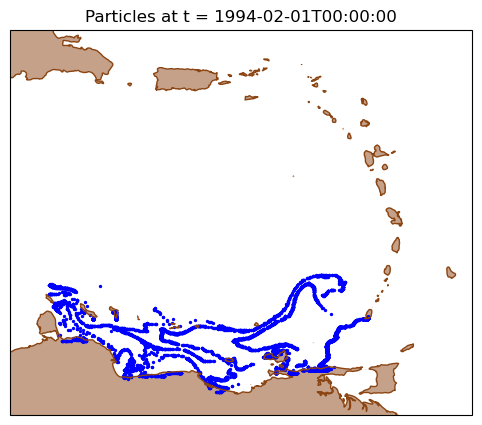

In [ ]:
# SIMPLE ANIMATION

# Number of timesteps to animate
nframes = 50    # use less frames for testing purposes

# figure setup
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_xlim(-71, -59)
ax.set_ylim(9.5, 19.5)
ax.coastlines(color='saddlebrown')
ax.add_feature(cfeature.LAND, alpha=0.5, facecolor='saddlebrown')

# Find particles at the first time step
time_id = np.where(ds["time"] == timerange[0])
initial_lons = ds["lon"].values[time_id]
initial_lats = ds["lat"].values[time_id]

# Remove any NaN values for initial plot
valid_initial = ~np.isnan(initial_lons) & ~np.isnan(initial_lats)
# plot first timestep
scatter = ax.scatter(
    initial_lons[valid_initial], 
    initial_lats[valid_initial], 
    s=2, c='b'
)

# Set initial title
t_str = str(timerange[0])[:19]  # Format datetime nicely
title = ax.set_title(f"Particles at t = {t_str}")

# loop over for animation
def animate(i):
    print(f"Animating frame {i+1}/{len(timerange)} at time {timerange[i]}")
    t_str = str(timerange[i])[:19]
    title.set_text(f"Particles at t = {t_str}")
    
    # Find particles at current time
    time_id = np.where(ds["time"] == timerange[i])
    current_lons = ds["lon"].values[time_id]
    current_lats = ds["lat"].values[time_id]
    
    # Remove NaN values
    valid = ~np.isnan(current_lons) & ~np.isnan(current_lats)
    
    # Update scatter plot positions using scatter.set_offsets
    if np.any(valid):
        scatter.set_offsets(np.c_[current_lons[valid], current_lats[valid]])
    else:
        scatter.set_offsets(np.empty((0, 2)))  # Empty array if no valid particles

# Create animation
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=nframes, interval=100)
anim

In [ ]:
# TASK 1: backward tracking
# Create animation that starts at the last existing timestep of the Parcels dataset

In [ ]:
# TASK 2: start animation at chosen time
# Start animation on the 1st of February 1994

In [ ]:
# TASK 3: adding colors
# Use different color of particles for every new time of release

In [ ]:
# TASK 4 (advanced): particle trails
# Add particle trails showing the last 10 days of trajectory

# HINT 1: plot trails for every 10th particle to speed up the animation

# HINT 2: you can pre-compute the data for all particles at all time steps to speed up the animation
# all_particles_data = []
# for i, target_time in enumerate(timerange):
#     time_id = np.where(ds["time"] == target_time)
#     lons = ds["lon"].values[time_id]
#     lats = ds["lat"].values[time_id]
#     particle_indices = time_id[0
#     valid = ~np.isnan(lons) & ~np.isnan(lats)
    
#     all_particles_data.append({
#         'lons': lons[valid],
#         'lats': lats[valid], 
#         'particle_indices': particle_indices[valid],
#         'valid_count': np.sum(valid)
#     })